# Assignment 3. Linear Regression
**Name:** Lotte Meijer 
**Student nr.:** 1661695


### How linear Regression works

With linear regression you can build a model based on a dataset. You create a linear line based on al the datapoints. A linear regression has a straight line around all the datapoints and the line attempts to be as close to all the datapoints as possible. It does this by minimizing the squared errors.

The basic formula for linear regression is $Y = B0 + B1X$
* The Y is the dependent variable
* The B0 is the intersect (where the line intersects with the Y-axis)
* The B1X is the slope (how much the Y increases when the X goes one step further)

In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


### Selecting the variables
Here I selected the variables that I will look at for the predictions. I checked wich variables might be interesting. In the plot you can see the correlations of the selected variables and the target.

In [62]:
df_subset = df[['shares_log', 'n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']]

y = df_subset['shares_log'] #We need to take out the shares as our Y-variable
X = df_subset.loc[:,'n_tokens_title':'weekday_is_saturday'] #this slices the dataframe to include all rows and the columns from "n_tokens_title" to "weekday_is_sunday"
#X.index = df_subset['address'] #this stores the street names in the column names, so we don't lose track of them later
X.head()

,n_tokens_title,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday
0,10,12,0,0,0,0,0,1,0,1,0,0,0,0
1,9,6,0,0,0,0,0,0,1,0,0,0,0,0
2,11,0,1,0,0,0,0,0,0,0,0,0,1,0
3,8,2,0,0,0,1,0,0,0,0,0,1,0,0
4,9,18,0,0,0,0,0,1,0,1,0,0,0,0


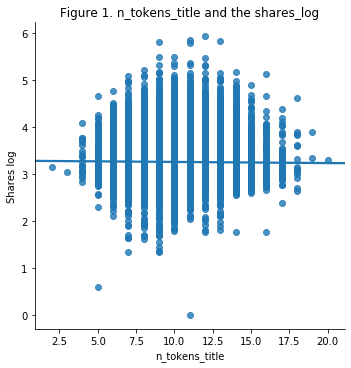

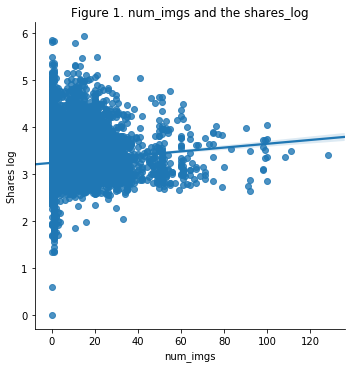

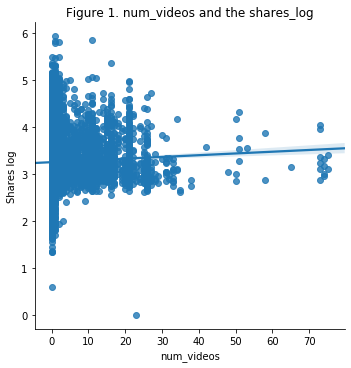

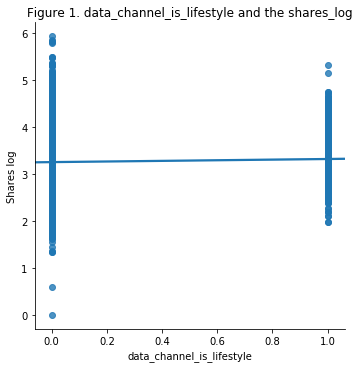

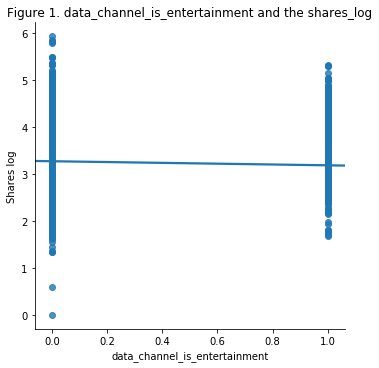

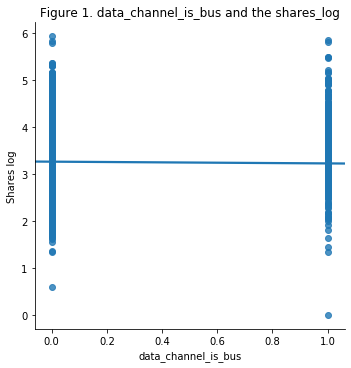

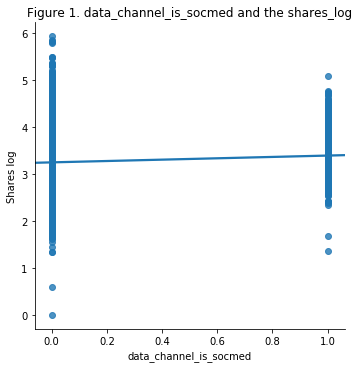

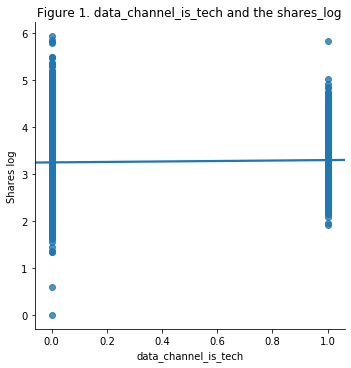

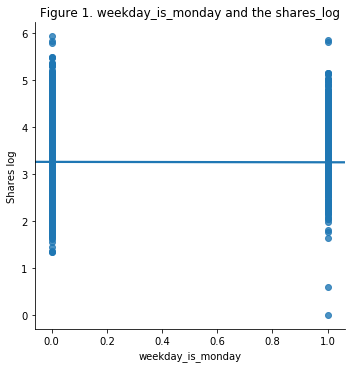

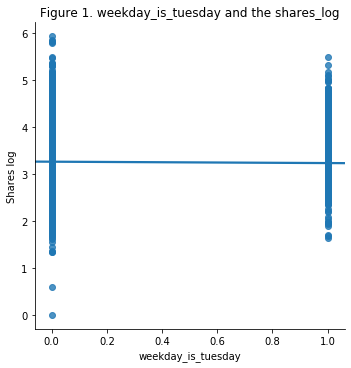

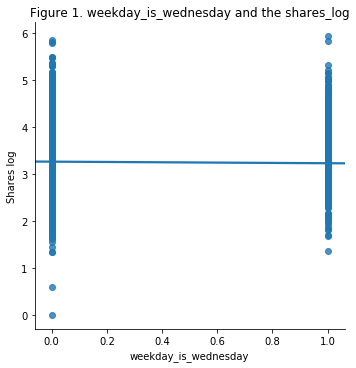

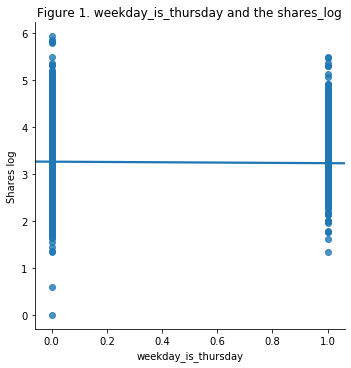

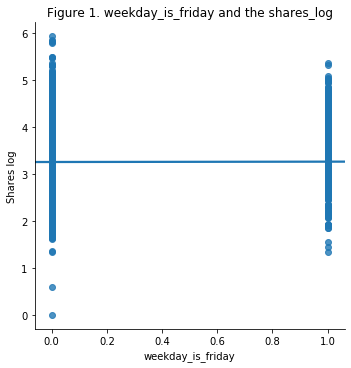

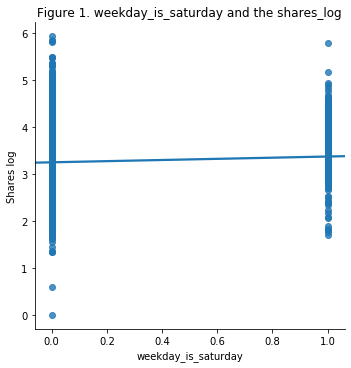

In [64]:
x_vars=['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']
for every in x_vars: 
    sns.lmplot(x=every, y="shares_log", fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line; see below
    plt.xlabel(every) #use matplotlib to refine Seaborn plot
    plt.ylabel("Shares log")
    plt.title("Figure 1. " + every + " and the shares_log")
    plt.show()

### The linearity of the relationships
The relationship between the tokens in the title and the shares is not very strong, the relationship between the shares_log and the number of images is a bit stronger the distance from the line (the variation) seems to increase with a low amount of images. The relation between the shares_log and the number of videos is sort of the same and the variation also increases with a low amount of videos.


### Dividing the train and the test-set
Here I divide the train and the test set. The dividing is 70% train-data and 30% test-data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

### Training the data
Here I create a linear regression model and I train it to fit the data. After that I get the coefficient of every variable, I will use the coefficients later in the formula.

In [ ]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [ ]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

In [ ]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_value = r2_score(y_test, y_test_p)
print("The R^2 is: ", r2_value, "this is the variance that can be explained by the model")

In [ ]:
math.sqrt(mean_squared_error(y_test, y_test_p))

We are typicaly 0.3982 off in our predictions for the shares

In [ ]:
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_subset[['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 
               'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']]
 #multiple bracets because you can have multiple x's
y = df_subset['shares_log']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #n_tokens_title #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] #num_imgs
b3 = lm.coef_[2] #num_videos
b4 = lm.coef_[3] #data_channel_is_lifestyle
b5 = lm.coef_[4] #data_channel_is_entertainment
b6 = lm.coef_[5] #data_channel_is_bus
b7 = lm.coef_[6] #data_channel_is_socmed
b8 = lm.coef_[7] #data_channel_is_tech
b9 = lm.coef_[8] 
b10 = lm.coef_[9] #weekday_is_monday
b11 = lm.coef_[10] #weekday_is_tuesday
b12 = lm.coef_[11] #weekday_is_wednesday
b13 = lm.coef_[12] #weekday_is_thursday
b14 = lm.coef_[13] #weekday_is_friday

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X2 + {b3:.2f}X3 + {b4:.2f}X4 + {b5:.2f}X5 + {b6:.2f}X6 + {b7:.2f}X7 + {b8:.2f}X8 + {b9:.2f}X9 + {b10:.2f}X10 + {b11:.2f}X11 + {b12:.2f}X12 + {b13:.2f}X13 + {b14:.2f}X14") #.0f formats to 2 decimals.

The regression line is equal to $y = 3.30 + 0.00X + 0.00X2 + 0.01X3 + 0.07X4 + -0.08X5 + 0.00X6 + 0.15X7 + 0.06X8 + -0.11X9 + -0.13X10 + -0.13X11 + -0.13X12 + -0.10X13 + 0.00X14$

### Prediction of the number of shares
First I create a new column with the predicted shares, then I plot the actual shares and the predicted shares.

In [68]:
df_subset['shares_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_subset.head(10)

C:\Users\lotte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,shares_log,n_tokens_title,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,shares_p
0,3.322219,10,12,0,0,0,0,0,1,0,1,0,0,0,0,3.299967
1,2.437751,9,6,0,0,0,0,0,0,1,0,0,0,0,0,3.235265
2,3.176091,11,0,1,0,0,0,0,0,0,0,0,0,1,0,3.228506
3,3.301030,8,2,0,0,0,1,0,0,0,0,0,1,0,0,3.194876
4,3.778151,9,18,0,0,0,0,0,1,0,1,0,0,0,0,3.325103
5,3.079181,13,2,0,0,0,0,0,0,0,0,0,1,0,0,3.201258
6,3.544068,6,11,0,0,0,0,0,1,0,0,0,0,0,1,3.419260
7,3.176091,12,1,0,0,0,0,1,0,0,1,0,0,0,0,3.348404
8,3.491362,8,1,0,0,0,0,0,1,0,0,0,1,0,0,3.246039
9,4.436163,11,1,1,0,0,1,0,0,0,0,0,0,0,1,3.333617


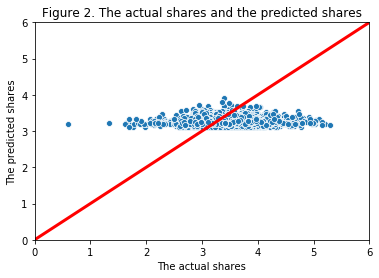

In [79]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('The actual shares')
plt.ylabel('The predicted shares')
plt.title('Figure 2. The actual shares and the predicted shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare them
plt.ylim([0,6])
plt.plot([0,6], [0,6], color='red', lw=3) #Plot a diagonal length
plt.show()

### Predicted and actual shares
In **Figure 2. The predicted shares and the actual shares** you can see that the model overshoots with a lower actual number of shares and it undershoots with a higher number of actual shares.

### The residual 
First I create a new column with the residual of the actuals shares and the predicted shares. Than I plot the residuals of all the variables with all the variables.


In [77]:
df_subset['resid'] = df_subset["shares_log"] - df_subset["shares_p"] #get the residuals by subtracting the prediction from the actual price
df_subset.head()

C:\Users\lotte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,shares_log,n_tokens_title,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,shares_p,resid
0,3.322219,10,12,0,0,0,0,0,1,0,1,0,0,0,0,3.299967,0.022252
1,2.437751,9,6,0,0,0,0,0,0,1,0,0,0,0,0,3.235265,-0.797515
2,3.176091,11,0,1,0,0,0,0,0,0,0,0,0,1,0,3.228506,-0.052415
3,3.301030,8,2,0,0,0,1,0,0,0,0,0,1,0,0,3.194876,0.106154
4,3.778151,9,18,0,0,0,0,0,1,0,1,0,0,0,0,3.325103,0.453048


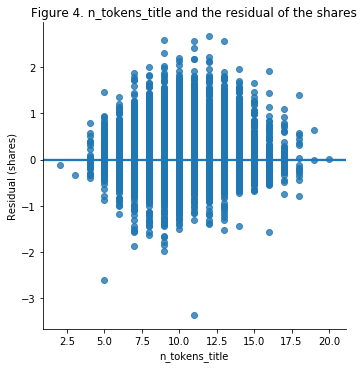

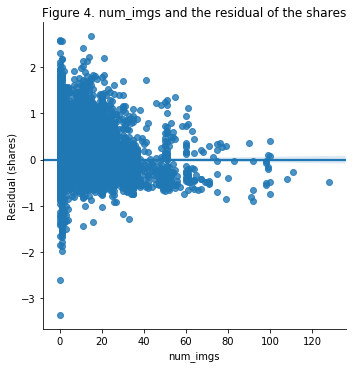

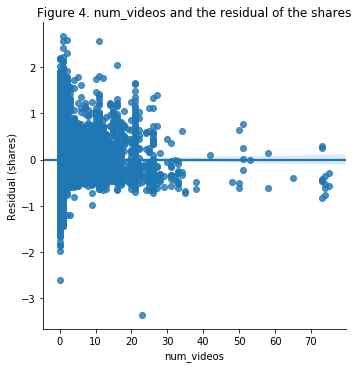

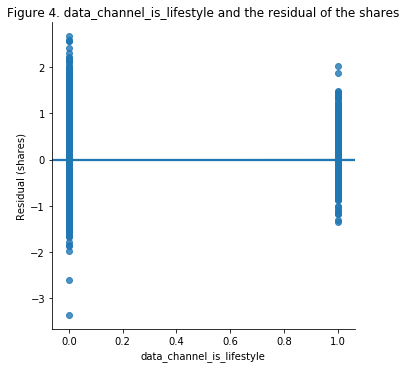

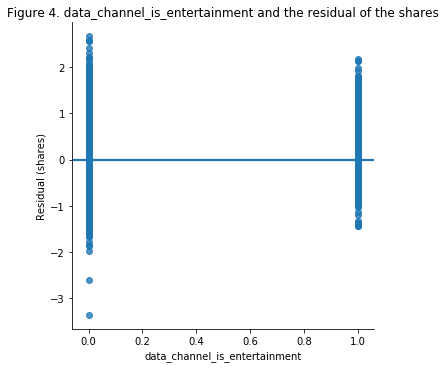

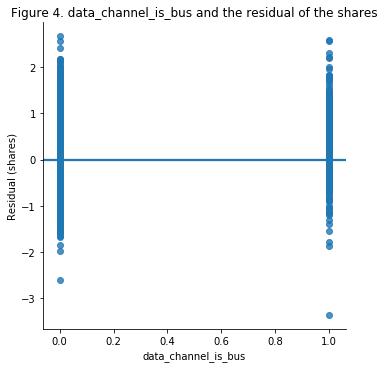

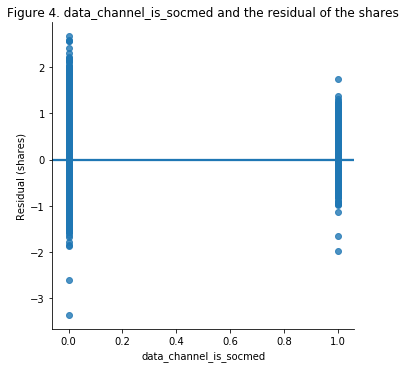

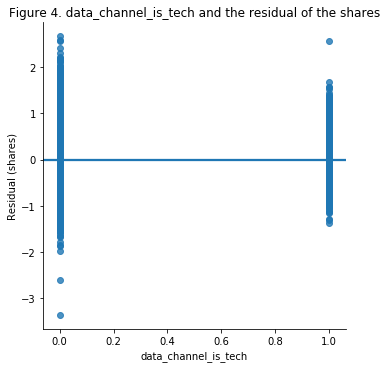

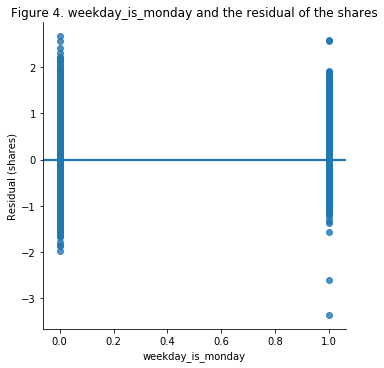

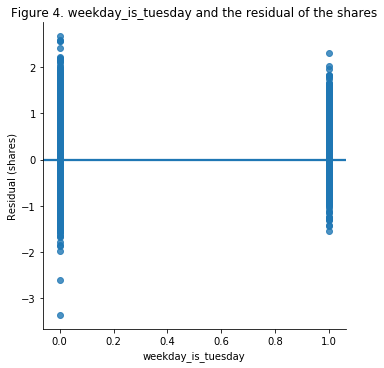

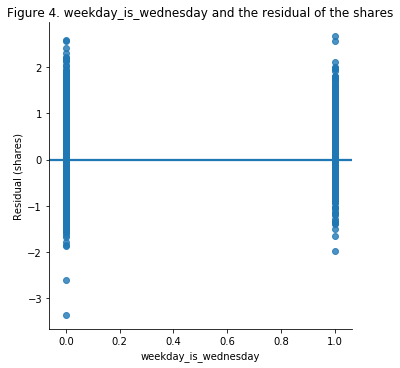

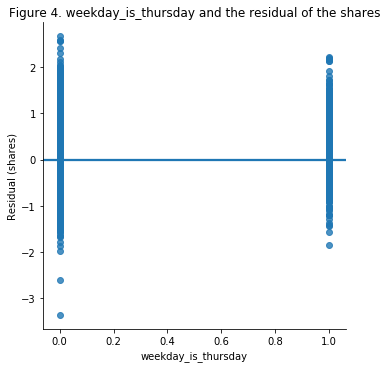

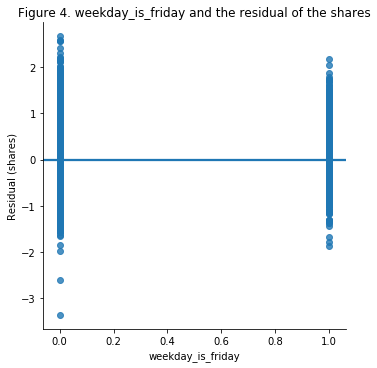

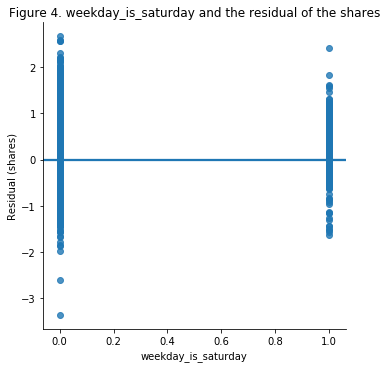

In [78]:
variables=['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']

for every in variables: 
    sns.lmplot(x=every, y="resid", fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line; see below
    plt.xlabel(every) #use matplotlib to refine Seaborn plot
    plt.ylabel("Residual (shares)")
    plt.title("Figure 4. " + every + " and the residual of the shares")
    plt.show()

The errors get bigger with a lower number of shares. You can see this with the number of images and videos. The tokens in the title give bigger errors with the number of shares in the middle.